**Data Source:** Pleschberger, Martin, Zernig, Anja, & Kaestner, Andre. (2020). Equipment Sensor Data from Semiconductor Frontend Production (Version 1) [Data set]. Zenodo. http://doi.org/10.5281/zenodo.4282611

In [1]:
import os
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, f1_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!head -n 3 equipment1.csv
!echo
!head -n 3 equipment2.csv
!echo
!head -n 3 response.csv

lot;wafer;timestamp;sensor_1;sensor_2;sensor_3;sensor_4;sensor_5;sensor_6;sensor_7;sensor_8;sensor_9;sensor_10;sensor_11;sensor_12;sensor_13;sensor_14;sensor_15;sensor_16;sensor_17;sensor_18;sensor_19;sensor_20;sensor_21;sensor_22;sensor_23;sensor_24
lot2;1;timestamp_0;0.0;0.0;15.1604;105.417;99.18;0.0;2.77728;0.0;1.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0;7.0;200.0;151.891;0.0;47.5;0.0;-1.0;19.05
lot2;1;timestamp_1;0.0;0.0;15.092;100.51;98.18;0.0;2.77465;0.0;1.0;0.91;4.0;0.0;0.0;0.0;0.0;0.0;7.0;200.0;151.40200000000004;0.0;48.5;0.0;-1.0;0.99

lot;wafer;timestamp;sensor_25;sensor_26;sensor_27;sensor_28;sensor_29;sensor_30;sensor_31;sensor_32;sensor_33;sensor_34;sensor_35;sensor_36;sensor_37;sensor_38;sensor_39;sensor_40;sensor_41;sensor_42;sensor_43;sensor_44;sensor_45;sensor_46;sensor_47;sensor_48;sensor_49;sensor_50;sensor_51;sensor_52;sensor_53;sensor_54;sensor_55;sensor_56
lot2;1;timestamp_0;0.0;382.64;99.0;11.0;0.0;0.0;0.3055033;1.443347;0.0;1.8520329999999997e-07;61.93445;0.0;0.5188147;0.40

In [3]:
sensors_1_to_24 = pd.read_csv('equipment1.csv', sep=';')
sensors_25_to_56 = pd.read_csv('equipment2.csv', sep=';')
response = pd.read_csv('response.csv', sep=';')

In [4]:
print(sensors_1_to_24.head(3))
print(response.head(3))

    lot  wafer    timestamp  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
0  lot2      1  timestamp_0       0.0       0.0   15.1604  105.4170     99.18   
1  lot2      1  timestamp_1       0.0       0.0   15.0920  100.5100     98.18   
2  lot2      1  timestamp_2       0.0       0.0   15.0432   95.3093     95.18   

   sensor_6  sensor_7  sensor_8  sensor_9  sensor_10  sensor_11  sensor_12  \
0       0.0   2.77728       0.0       1.0       0.00        0.0        0.0   
1       0.0   2.77465       0.0       1.0       0.91        4.0        0.0   
2       0.0   2.86352       0.0       1.0       1.91        3.0        0.0   

   sensor_13  sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  \
0        0.0        0.0        0.0        0.0        7.0      200.0   
1        0.0        0.0        0.0        0.0        7.0      200.0   
2        0.0        0.0        0.0        0.0        7.0      200.0   

   sensor_19  sensor_20  sensor_21  sensor_22  sensor_23  sensor_24  
0    15

In [5]:
print(sensors_1_to_24.shape)
print(sensors_25_to_56.shape)
print(response.shape)

(170896, 27)
(232144, 35)
(2638, 4)


In [6]:
sensors_1_to_24.lot = sensors_1_to_24.lot.str.replace('lot', '').astype('int64')
sensors_1_to_24.timestamp = sensors_1_to_24.timestamp.str.replace('timestamp_', '').astype('int64')

In [7]:
print(sensors_1_to_24['lot'].head(3))
print(sensors_25_to_56['timestamp'].head(3))
print(response['lot'].head(3))

0    2
1    2
2    2
Name: lot, dtype: int64
0    timestamp_0
1    timestamp_1
2    timestamp_2
Name: timestamp, dtype: object
0    lot2
1    lot2
2    lot2
Name: lot, dtype: object


In [8]:
sensors_25_to_56.lot = sensors_25_to_56.lot.str.replace('lot', '').astype('int64')
sensors_25_to_56.timestamp = sensors_25_to_56.timestamp.str.replace('timestamp_', '').astype('int64')

response['class'] = response['class'].replace(['good', 'bad'], [1, 0]).astype('int64')
response.lot = response.lot.str.replace('lot', '').astype('int64')

In [9]:
print(sensors_1_to_24['lot'].head(3))
print(sensors_25_to_56['timestamp'].head(3))
print(response['lot'].head(3))

0    2
1    2
2    2
Name: lot, dtype: int64
0    0
1    1
2    2
Name: timestamp, dtype: int64
0    2
1    2
2    2
Name: lot, dtype: int64


In [10]:
print("Equipment 1 dataset shape:", sensors_1_to_24.shape, \
      '\n'\
      "Equipment 2 dataset shape:", sensors_25_to_56.shape, \
      '\n'\
      "Response dataset shape:", response.shape)

Equipment 1 dataset shape: (170896, 27) 
Equipment 2 dataset shape: (232144, 35) 
Response dataset shape: (2638, 4)


In [11]:
print(sensors_1_to_24.isna().sum())
print(sensors_25_to_56.isna().sum())
print(response.isna().sum())

lot          0
wafer        0
timestamp    0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
sensor_22    0
sensor_23    0
sensor_24    0
dtype: int64
lot          0
wafer        0
timestamp    0
sensor_25    0
sensor_26    0
sensor_27    0
sensor_28    0
sensor_29    0
sensor_30    0
sensor_31    0
sensor_32    0
sensor_33    0
sensor_34    0
sensor_35    0
sensor_36    0
sensor_37    0
sensor_38    0
sensor_39    0
sensor_40    0
sensor_41    0
sensor_42    0
sensor_43    0
sensor_44    0
sensor_45    0
sensor_46    0
sensor_47    0
sensor_48    0
sensor_49    0
sensor_50    0
sensor_51    0
sensor_52    0
sensor_53    0
sensor_54    0
sensor_55    0
sensor_56    0
dtype: int64
lot         0
wafer       0
response    0
cl

In [12]:
sensors_1_to_24 = sensors_1_to_24.groupby(['lot', 'wafer']).mean()
sensors_25_to_56 = sensors_25_to_56.groupby(['lot', 'wafer']).mean()
response = response.groupby(['lot', 'wafer']).mean()

In [13]:
sensor_data = sensors_1_to_24.merge(sensors_25_to_56, on=['lot', 'wafer'], how='outer')
print(sensor_data.shape)
sensor_data.isna().sum()

(1319, 58)


timestamp_x    348
sensor_1       348
sensor_2       348
sensor_3       348
sensor_4       348
sensor_5       348
sensor_6       348
sensor_7       348
sensor_8       348
sensor_9       348
sensor_10      348
sensor_11      348
sensor_12      348
sensor_13      348
sensor_14      348
sensor_15      348
sensor_16      348
sensor_17      348
sensor_18      348
sensor_19      348
sensor_20      348
sensor_21      348
sensor_22      348
sensor_23      348
sensor_24      348
timestamp_y      0
sensor_25        0
sensor_26        0
sensor_27        0
sensor_28        0
sensor_29        0
sensor_30        0
sensor_31        0
sensor_32        0
sensor_33        0
sensor_34        0
sensor_35        0
sensor_36        0
sensor_37        0
sensor_38        0
sensor_39        0
sensor_40        0
sensor_41        0
sensor_42        0
sensor_43        0
sensor_44        0
sensor_45        0
sensor_46        0
sensor_47        0
sensor_48        0
sensor_49        0
sensor_50        0
sensor_51   

In [14]:
sensor_data.sample(3)

,,timestamp_x,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,timestamp_y,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,sensor_52,sensor_53,sensor_54,sensor_55,sensor_56
lot,wafer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
54,22,87.5,5.141874,5.171591,13.419849,42.640064,43.039489,0.0,9.237796,0.752385,7.369318,11.629545,13.028409,0.0,0.266901,0.266901,0.266901,0.266901,6.244318,396.180756,74.056374,9.840909,81.209091,212.314659,477.454545,1.034318,87.5,0.001366,114.457094,60.1875,6.920455,0.002102,20.446193,10.246943,72.951446,0.0,0.001813,37.701524,0.0,23.131470,41.827561,38.820378,188.948155,3.309871,120.040216,121.707989,1.017045,305.697330,29.024545,305.692740,15.301591,174.642045,28.372727,173.175000,121.639664,0.000006,372.272861,0.489564,0.607841
49,16,87.5,5.184000,5.284091,13.324866,42.921750,42.634943,0.0,9.336365,0.798163,7.363636,11.563636,12.960227,0.0,0.272327,0.272327,0.272327,0.272327,6.204545,395.316795,73.977911,9.772727,80.992614,215.722074,477.460227,1.033750,87.5,0.001400,136.081656,62.4375,6.937500,0.000000,20.405114,10.401399,74.604949,0.0,0.001860,39.129869,0.0,19.855585,41.041429,39.684955,175.480563,1.539659,124.540661,127.318191,1.073864,436.302595,30.543523,689.677597,15.573977,172.267045,29.981818,175.021591,126.192820,366.652329,0.000006,0.528547,0.630625
54,3,87.5,5.138459,5.248295,13.923937,43.316325,43.185227,0.0,9.533660,2.677826,7.744318,12.159432,13.812500,0.0,0.267239,0.267239,0.267239,0.267239,6.482955,408.468580,99.267305,10.306818,89.975000,215.676875,477.420455,1.034205,87.5,0.001323,106.949250,57.9375,6.437500,0.002386,20.446364,10.060040,71.036095,0.0,0.001813,36.279798,0.0,24.352730,39.174530,37.275380,183.011352,2.182906,115.659078,117.292346,0.971591,283.228886,28.624659,283.225295,14.999034,171.221591,28.775568,174.107386,116.961839,419.925148,0.000008,0.778272,0.585114


In [15]:
response.isna().sum()

response    0
class       0
dtype: int64

In [16]:
data = sensor_data.merge(response, on=['lot', 'wafer'], how='outer')
print(data.shape)
data.isna().sum()

(1319, 60)


timestamp_x    348
sensor_1       348
sensor_2       348
sensor_3       348
sensor_4       348
sensor_5       348
sensor_6       348
sensor_7       348
sensor_8       348
sensor_9       348
sensor_10      348
sensor_11      348
sensor_12      348
sensor_13      348
sensor_14      348
sensor_15      348
sensor_16      348
sensor_17      348
sensor_18      348
sensor_19      348
sensor_20      348
sensor_21      348
sensor_22      348
sensor_23      348
sensor_24      348
timestamp_y      0
sensor_25        0
sensor_26        0
sensor_27        0
sensor_28        0
sensor_29        0
sensor_30        0
sensor_31        0
sensor_32        0
sensor_33        0
sensor_34        0
sensor_35        0
sensor_36        0
sensor_37        0
sensor_38        0
sensor_39        0
sensor_40        0
sensor_41        0
sensor_42        0
sensor_43        0
sensor_44        0
sensor_45        0
sensor_46        0
sensor_47        0
sensor_48        0
sensor_49        0
sensor_50        0
sensor_51   

In [17]:
data = data.dropna()
#data = data.fillna()

In [18]:
data = data.reset_index()
data.head()

,lot,wafer,timestamp_x,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,timestamp_y,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,sensor_52,sensor_53,sensor_54,sensor_55,sensor_56,response,class
0,2,1,87.5,5.231203,5.176705,13.251176,42.618787,43.066761,0.0,8.505448,0.0,7.267045,11.703011,12.346591,0.0,0.266298,0.266298,0.266298,0.266298,6.164773,398.018165,126.723761,9.778409,79.217614,208.905500,467.232955,0.983864,87.5,0.001495,232.694903,60.1875,6.6875,0.0,21.821591,11.296246,79.692877,0.0,0.001977,37.624962,0.0,21.595660,44.118530,42.609528,189.509110,1.660068,120.094154,122.751516,1.022727,690.483790,33.894318,1323.791176,16.962955,183.738636,33.119886,181.149432,121.631172,344.745734,0.000004,0.509069,0.607955,1.0278,0
1,2,2,87.5,5.196315,5.142614,13.666808,43.419169,43.147443,0.0,9.167583,0.0,7.607955,11.960227,12.761364,0.0,0.266162,0.266162,0.266162,0.266162,6.363636,408.363824,201.201568,10.329545,88.847159,208.953966,467.204545,1.017557,87.5,0.001500,245.951321,63.5625,7.0625,0.0,22.105284,10.849002,80.814970,0.0,0.001973,39.854000,0.0,22.763340,45.344954,43.932713,196.958829,2.555232,126.819666,129.624593,1.096591,729.909761,33.471932,1398.728761,16.871875,184.289773,33.414205,184.728977,128.418243,0.000006,396.140498,0.592390,0.642045,0.3906,1
2,2,3,87.5,5.161432,5.255114,13.243853,42.981363,42.650795,0.0,8.666924,0.0,7.295455,11.563523,12.551136,0.0,0.266903,0.266903,0.266903,0.266903,6.164773,398.137699,113.195898,9.727273,79.772727,212.313545,477.465909,0.987557,87.5,0.001505,243.975941,63.0000,7.0000,0.0,21.821420,11.063067,80.783452,0.0,0.001954,39.408217,0.0,22.018238,44.152238,43.927304,196.613328,1.506227,125.711287,128.485525,1.085227,724.134585,33.594432,1387.033733,16.950114,184.193182,33.901705,185.005682,127.305186,395.800252,0.000006,0.526011,0.636648,0.3906,1
3,2,4,87.5,5.175509,5.294318,13.671360,43.151993,42.904432,0.0,9.621476,0.0,7.613636,12.191591,13.215909,0.0,0.267062,0.267062,0.267062,0.267062,6.363636,408.062517,179.183085,10.164773,88.403409,212.313250,477.437500,1.015966,87.5,0.001509,246.357599,63.5625,7.0625,0.0,22.105057,10.858582,80.050300,0.0,0.001954,39.754566,0.0,21.757269,44.262521,41.514607,186.699584,2.946146,126.834402,129.642807,1.090909,731.288153,33.811364,1400.105239,16.922727,186.681818,33.025000,183.875000,128.404890,0.000007,394.003550,0.521722,0.641989,0.4050,1
4,2,5,87.5,5.201729,5.127273,13.332878,43.262745,43.001705,0.0,9.275963,0.0,7.335227,11.556989,12.568182,0.0,0.266392,0.266392,0.266392,0.266392,6.204545,398.231636,107.544619,9.715909,80.952273,208.906159,467.227273,1.011364,87.5,0.001499,246.561347,63.5625,7.0625,0.0,22.104545,11.069689,80.733545,0.0,0.001977,39.854118,0.0,22.053265,44.748803,43.069595,189.190050,2.231319,126.825392,129.619909,1.096591,731.981176,33.668523,1400.797193,16.985341,184.085227,33.340909,184.797159,128.457781,393.215546,0.000007,0.528508,0.641932,0.4050,1


In [19]:
data.dtypes

lot              int64
wafer            int64
timestamp_x    float64
sensor_1       float64
sensor_2       float64
sensor_3       float64
sensor_4       float64
sensor_5       float64
sensor_6       float64
sensor_7       float64
sensor_8       float64
sensor_9       float64
sensor_10      float64
sensor_11      float64
sensor_12      float64
sensor_13      float64
sensor_14      float64
sensor_15      float64
sensor_16      float64
sensor_17      float64
sensor_18      float64
sensor_19      float64
sensor_20      float64
sensor_21      float64
sensor_22      float64
sensor_23      float64
sensor_24      float64
timestamp_y    float64
sensor_25      float64
sensor_26      float64
sensor_27      float64
sensor_28      float64
sensor_29      float64
sensor_30      float64
sensor_31      float64
sensor_32      float64
sensor_33      float64
sensor_34      float64
sensor_35      float64
sensor_36      float64
sensor_37      float64
sensor_38      float64
sensor_39      float64
sensor_40  

In [20]:
print(data.lot.unique())
print(data.wafer.unique())

[  2   3   4   5   6   8  10  11  12  13  16  17  18  19  24  29  31  32
  35  37  40  47  49  50  51  52  54  58  60  61  65  67  70  72  74  76
  79  84  86 103]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


In [21]:
bad_class_sum = (data['class']==0).sum()
good_class_sum = (data['class']==1).sum()
print(bad_class_sum * 100 / (bad_class_sum + good_class_sum),"%")

17.507723995880536 %


In [22]:
def ECDF(df_column):
    '''returns sorted data as x and proportionate 0.0 to 1.0 y values'''
    x = np.sort(df_column)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

def ECDF_plot():
    plt.figure(figsize=(50.0,50.0))
    plt.subplots_adjust(hspace=0.5)
    for ax, n in list(enumerate(data.columns)):
        x, y = ECDF(data[n])
        plt.subplot(10, 10, ax+1)
        plt.grid(True)
        x_ecdf = plt.plot(x, y, marker='.', linestyle='none')
        plt.xlabel('%s readings' %n)
        plt.ylim(0, 1.0)
        plt.yticks(np.arange(0, 1.1, 0.1))
        plt.ylabel('ECDF')
        plt.margins(0.02)
        
#ECDF_plot()     #Uncomment for ECDF plots

In [23]:
print(data.corr()['class'].sort_values().head())
print(data.corr()['response'].sort_values().head())

response    -0.898600
sensor_24   -0.421485
sensor_2    -0.408268
sensor_1    -0.407393
sensor_5    -0.407297
Name: class, dtype: float64
class       -0.898600
sensor_3    -0.373243
sensor_20   -0.372276
sensor_7    -0.338698
sensor_47   -0.286064
Name: response, dtype: float64


**Classification**

In [24]:
target_list = ['response', 'class']
feature_list = list(set(data.columns) - set(target_list))

In [25]:
print(feature_list)

['sensor_54', 'sensor_31', 'sensor_49', 'sensor_27', 'sensor_52', 'sensor_16', 'sensor_44', 'sensor_15', 'sensor_47', 'sensor_53', 'sensor_18', 'sensor_26', 'sensor_48', 'sensor_33', 'sensor_1', 'sensor_6', 'sensor_29', 'sensor_42', 'sensor_24', 'sensor_51', 'sensor_17', 'sensor_19', 'sensor_28', 'sensor_14', 'sensor_50', 'sensor_7', 'sensor_43', 'sensor_46', 'sensor_12', 'sensor_39', 'sensor_35', 'sensor_21', 'sensor_41', 'sensor_38', 'sensor_37', 'sensor_30', 'wafer', 'sensor_23', 'sensor_36', 'sensor_3', 'sensor_56', 'timestamp_y', 'sensor_55', 'sensor_40', 'sensor_9', 'sensor_20', 'sensor_10', 'lot', 'timestamp_x', 'sensor_11', 'sensor_22', 'sensor_32', 'sensor_8', 'sensor_25', 'sensor_45', 'sensor_13', 'sensor_34', 'sensor_5', 'sensor_4', 'sensor_2']


In [26]:
sensor_list = [item for item in feature_list if item.startswith("sensor_")]
print(sensor_list)

['sensor_54', 'sensor_31', 'sensor_49', 'sensor_27', 'sensor_52', 'sensor_16', 'sensor_44', 'sensor_15', 'sensor_47', 'sensor_53', 'sensor_18', 'sensor_26', 'sensor_48', 'sensor_33', 'sensor_1', 'sensor_6', 'sensor_29', 'sensor_42', 'sensor_24', 'sensor_51', 'sensor_17', 'sensor_19', 'sensor_28', 'sensor_14', 'sensor_50', 'sensor_7', 'sensor_43', 'sensor_46', 'sensor_12', 'sensor_39', 'sensor_35', 'sensor_21', 'sensor_41', 'sensor_38', 'sensor_37', 'sensor_30', 'sensor_23', 'sensor_36', 'sensor_3', 'sensor_56', 'sensor_55', 'sensor_40', 'sensor_9', 'sensor_20', 'sensor_10', 'sensor_11', 'sensor_22', 'sensor_32', 'sensor_8', 'sensor_25', 'sensor_45', 'sensor_13', 'sensor_34', 'sensor_5', 'sensor_4', 'sensor_2']


**Sensor Data Scaling**

In [27]:
scaler = StandardScaler()
data[sensor_list] = scaler.fit_transform(data[sensor_list])

In [28]:
X_all_features = data[feature_list]
X_sensors_only = data[sensor_list]

**Test Train split**

In [29]:
X = X_all_features
y = data['class']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
print(type(X_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
(776, 60)
(776,)
(195, 60)
(195,)


**Logistic Regression Classification with Lot and Wafer as nominal data types**

In [32]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.50      0.62        42
           1       0.88      0.97      0.92       153

    accuracy                           0.87       195
   macro avg       0.84      0.73      0.77       195
weighted avg       0.86      0.87      0.85       195

              precision    recall  f1-score   support

           0       0.65      0.40      0.50       128
           1       0.89      0.96      0.92       648

    accuracy                           0.87       776
   macro avg       0.77      0.68      0.71       776
weighted avg       0.85      0.87      0.85       776



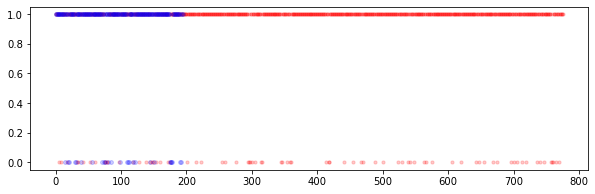

In [34]:
plt.figure(figsize=(10,3))
plt.ylim(-0.05, 1.05)

plt.scatter(np.arange(len(y_train)), y_pred_train, c='red', s=10, alpha=0.2);
plt.scatter(np.arange(len(y_test)), y_pred_test, c='blue', s=15, alpha=0.2);

print(classification_report(y_test, y_pred_test))
print(classification_report(y_train, y_pred_train))

**Feature Engineering** - **Dummy Encoding lot and wafer**

In [35]:
data_encoded = pd.get_dummies(data, columns=['lot', 'wafer'])

In [36]:
print(data_encoded.shape)
data_encoded.head();

(971, 125)


In [37]:
data_encoded.dtypes

timestamp_x    float64
sensor_1       float64
sensor_2       float64
sensor_3       float64
sensor_4       float64
                ...   
wafer_21         uint8
wafer_22         uint8
wafer_23         uint8
wafer_24         uint8
wafer_25         uint8
Length: 125, dtype: object

In [38]:
data_encoded.columns;

targets = ['response', 'class']
features = list(set(data_encoded.columns)-set(target_list))

In [39]:
X = data_encoded[features]
y = data_encoded['class']

In [40]:
print(X.shape, y.shape)
X.sample(3)

(971, 123) (971,)


,sensor_54,wafer_16,sensor_27,sensor_52,sensor_16,wafer_10,wafer_13,wafer_15,lot_3,wafer_19,lot_10,lot_70,sensor_15,sensor_26,sensor_33,lot_11,sensor_6,sensor_1,lot_17,lot_67,lot_12,sensor_17,sensor_19,sensor_14,sensor_7,wafer_8,lot_16,lot_2,lot_86,sensor_46,sensor_12,lot_50,sensor_35,lot_49,sensor_41,lot_58,sensor_56,lot_5,lot_4,lot_51,sensor_9,wafer_18,sensor_10,lot_103,sensor_11,lot_32,sensor_8,lot_19,lot_60,wafer_3,...,lot_65,wafer_22,lot_29,sensor_42,sensor_24,sensor_28,lot_24,wafer_9,sensor_50,lot_84,wafer_2,sensor_43,lot_76,sensor_39,lot_79,sensor_21,sensor_38,wafer_1,sensor_37,sensor_30,lot_6,sensor_23,sensor_36,lot_31,lot_8,lot_37,sensor_3,lot_47,lot_54,wafer_4,sensor_55,wafer_24,sensor_40,timestamp_y,sensor_20,lot_74,wafer_21,timestamp_x,sensor_32,sensor_22,sensor_45,wafer_20,sensor_25,wafer_5,lot_13,sensor_13,sensor_34,sensor_5,sensor_4,sensor_51
147,0.906909,0,0.899560,0.803678,0.664010,0,0,0,0,0,0,0,0.662836,-1.665437,-0.032108,0,-0.245597,0.919187,0,0,0,-0.056367,-0.174169,0.628223,-1.168176,0,0,0,0,-0.393997,-0.270048,0,0.794421,0,4.229693,0,0.802711,0,0,0,-0.213908,0,0.199631,0,-0.731669,0,-0.113730,0,0,0,...,0,0,0,0.867730,0.945162,0.544176,0,0,0.078774,0,0,0.827060,0,-0.694988,0,-0.512713,1.113634,0,-0.664254,0.109991,0,0.666814,-0.032108,0,1,0,-0.929586,0,0,0,-0.511974,0,-1.460255,87.5,-0.976236,0,0,87.5,-0.002511,0.404512,-1.523200,0,0.742871,0,0,0.628223,-0.138378,0.926378,0.894948,0.285294
865,-1.007057,0,0.229821,0.284805,-1.841066,0,0,0,0,0,0,0,-1.837881,0.631882,-0.032108,0,-0.245597,-1.052521,0,0,0,-1.106036,-0.300120,-1.865000,1.106448,0,0,0,0,0.789905,-0.270048,0,0.290540,0,-0.023345,0,0.278154,0,0,0,-1.152739,0,-1.002650,0,-0.409244,0,-0.551894,0,0,0,...,0,0,0,0.226769,-1.135835,-0.133539,0,0,0.650670,0,0,0.324581,1,0.828679,0,1.780163,0.687153,0,-1.413390,0.464657,0,-1.066595,-0.032108,0,0,0,1.097814,0,0,0,-0.277003,0,-0.588146,87.5,1.087855,0,0,87.5,-0.066314,-1.333742,0.787812,1,0.129706,0,0,-1.865000,0.346211,-1.096316,-1.095722,0.210859
787,0.855129,0,0.229821,0.283080,0.822179,0,0,0,0,0,0,1,0.821434,-0.273299,-0.032108,0,-0.245597,1.026502,0,0,0,1.780553,-0.432759,0.797700,-0.545626,0,0,0,0,0.003404,-0.270048,0,0.284650,0,-0.414422,0,0.276850,0,0,0,1.713168,0,1.708637,0,2.021341,0,1.660950,0,0,0,...,0,0,0,0.245291,1.017328,-0.133539,0,0,0.351924,0,0,0.323972,0,-0.209092,0,-0.494333,-0.462530,0,-1.918733,0.464323,0,1.481308,-0.032108,0,0,0,-0.907055,0,0,0,-0.017170,0,-1.374808,87.5,-0.879031,0,0,87.5,0.019369,1.305004,-0.024200,0,0.414396,0,0,0.797700,0.275767,0.959612,0.927618,-0.144617


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2)

**Logistic regression**

In [42]:
log_reg = LogisticRegression(max_iter=550)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=550)

In [43]:
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [44]:
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred, pos_label=0))
print(f1_score(y_test, y_test_pred, pos_label=0))

              precision    recall  f1-score   support

           0       0.76      0.51      0.61        37
           1       0.89      0.96      0.93       158

    accuracy                           0.88       195
   macro avg       0.83      0.74      0.77       195
weighted avg       0.87      0.88      0.87       195

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       133
           1       0.96      0.96      0.96       643

    accuracy                           0.93       776
   macro avg       0.89      0.88      0.88       776
weighted avg       0.93      0.93      0.93       776

0.8075471698113208
0.6129032258064517


**Maximum iterations vs LBFGS solver convergence**

In [45]:
#If f1-score for class 0 is 0, solver unable to converge

In [46]:
hyper_log_reg = {}
max_iter_array = np.arange(10, 560, 10)

In [47]:
for iteration in max_iter_array:
    log_reg = LogisticRegression(max_iter=iteration)
    log_reg.fit(X_train, y_train)
    #hyper_log_reg[iteration] = 'Warning_waa_waa'
    y_train_pred = log_reg.predict(X_train)
    y_test_pred = log_reg.predict(X_test)
    
    hyper_log_reg[iteration] = f1_score(y_test, y_test_pred, pos_label=0)

/home/cisco/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/cisco/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

/home/cisco/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/cisco/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

/home/cisco/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/cisco/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [48]:
print(hyper_log_reg)

{10: 0.33333333333333337, 20: 0.5483870967741935, 30: 0.5263157894736842, 40: 0.5357142857142857, 50: 0.5090909090909091, 60: 0.5517241379310345, 70: 0.6000000000000001, 80: 0.576271186440678, 90: 0.6229508196721311, 100: 0.6229508196721311, 110: 0.6451612903225806, 120: 0.6349206349206349, 130: 0.625, 140: 0.625, 150: 0.6031746031746031, 160: 0.5901639344262296, 170: 0.6129032258064517, 180: 0.6129032258064517, 190: 0.6129032258064517, 200: 0.6129032258064517, 210: 0.6129032258064517, 220: 0.6129032258064517, 230: 0.6129032258064517, 240: 0.6129032258064517, 250: 0.6129032258064517, 260: 0.6129032258064517, 270: 0.6129032258064517, 280: 0.6129032258064517, 290: 0.6129032258064517, 300: 0.6129032258064517, 310: 0.6129032258064517, 320: 0.6129032258064517, 330: 0.6129032258064517, 340: 0.6129032258064517, 350: 0.6129032258064517, 360: 0.6129032258064517, 370: 0.6129032258064517, 380: 0.6129032258064517, 390: 0.6129032258064517, 400: 0.6129032258064517, 410: 0.6129032258064517, 420: 0.61

In [49]:
print(max(hyper_log_reg.values()))

0.6451612903225806


**Decision Tree**

In [50]:
#log_hyper = {'penalty':'L2', 'max_iter':1000, 'class_weight':0}
#decision_hyper = {'criterion':'gini', 'max_depth':2, 'class_weight':0}

In [51]:
fail_train_f1_score = {}
fail_test_f1_score = {}
for depth in np.arange(1,31):
    decision_tree = tree.DecisionTreeClassifier(max_depth=depth, random_state=157)
    decision_tree.fit(X_train, y_train)
    y_train_pred = decision_tree.predict(X_train)
    y_test_pred = decision_tree.predict(X_test)
    fail_train_f1_score[depth] = f1_score(y_train, y_train_pred, pos_label=0)
    fail_test_f1_score[depth] = f1_score(y_test, y_test_pred, pos_label=0)
    

In [52]:
print(fail_train_f1_score)
print(fail_test_f1_score)

{1: 0.0, 2: 0.6715328467153284, 3: 0.7915194346289753, 4: 0.8500000000000001, 5: 0.8840579710144928, 6: 0.8988764044943821, 7: 0.917910447761194, 8: 0.9446494464944649, 9: 0.9597069597069596, 10: 0.9779411764705883, 11: 0.981549815498155, 12: 0.9888475836431226, 13: 0.9888475836431226, 14: 0.9962546816479401, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 30: 1.0}
{1: 0.0, 2: 0.6575342465753425, 3: 0.6753246753246753, 4: 0.6753246753246753, 5: 0.6756756756756757, 6: 0.6486486486486487, 7: 0.619718309859155, 8: 0.6301369863013699, 9: 0.6575342465753425, 10: 0.6486486486486487, 11: 0.6575342465753425, 12: 0.6486486486486487, 13: 0.6756756756756757, 14: 0.6285714285714286, 15: 0.6285714285714286, 16: 0.6285714285714286, 17: 0.6285714285714286, 18: 0.6285714285714286, 19: 0.6285714285714286, 20: 0.6285714285714286, 21: 0.6285714285714286, 22: 0.6285714285714286, 23: 0.6285714285714286, 24: 0.62857142857

In [53]:
fail_train_f1_score.values()

dict_values([0.0, 0.6715328467153284, 0.7915194346289753, 0.8500000000000001, 0.8840579710144928, 0.8988764044943821, 0.917910447761194, 0.9446494464944649, 0.9597069597069596, 0.9779411764705883, 0.981549815498155, 0.9888475836431226, 0.9888475836431226, 0.9962546816479401, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

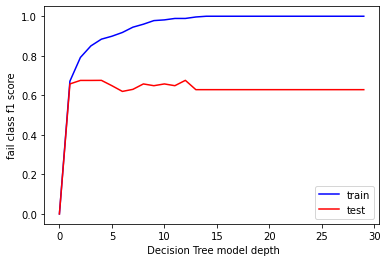

In [54]:
plt.plot(np.arange(len(fail_train_f1_score.values())), fail_train_f1_score.values(), color='blue')
plt.plot(np.arange(len(fail_test_f1_score.values())), fail_test_f1_score.values(), color='red')
plt.xlabel(' Decision Tree model depth', size=10)
plt.ylabel('fail class f1 score', size=10)
plt.legend(['train', 'test'])

best_depth = 3

Gini, depth of 3, training f1_score: 0.7915194346289753
Gini, depth of 3, testing f1_score: 0.6753246753246753
              precision    recall  f1-score   support

           0       0.65      0.70      0.68        37
           1       0.93      0.91      0.92       158

    accuracy                           0.87       195
   macro avg       0.79      0.81      0.80       195
weighted avg       0.88      0.87      0.87       195

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       133
           1       0.97      0.94      0.95       643

    accuracy                           0.92       776
   macro avg       0.86      0.89      0.87       776
weighted avg       0.93      0.92      0.93       776



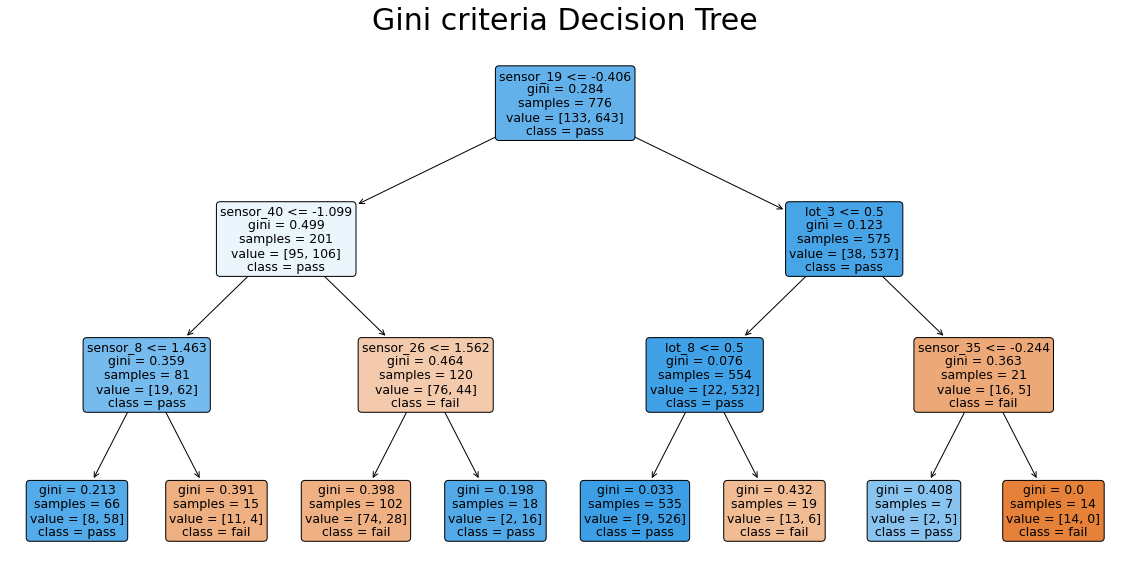

In [55]:
decision_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth=best_depth)
decision_tree.fit(X_train, y_train)

y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

y_test_pred_gini = y_test_pred

print('Gini, depth of 3, training f1_score:', f1_score(y_train, y_train_pred, pos_label=0))
print('Gini, depth of 3, testing f1_score:', f1_score(y_test, y_test_pred, pos_label=0))

print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

plt.figure(figsize=(20,10))
decision_tree_plot = tree.plot_tree(decision_tree, filled=True, rounded=True, feature_names=X_train.columns, class_names=["fail", "pass"])
plt.title('Gini criteria Decision Tree', size=30)
plt.show()

Entropy, depth of 3, training f1_score: 0.7058823529411764
Entropy, depth of 3, testing f1_score: 0.6206896551724138
              precision    recall  f1-score   support

           0       0.54      0.73      0.62        37
           1       0.93      0.85      0.89       158

    accuracy                           0.83       195
   macro avg       0.74      0.79      0.76       195
weighted avg       0.86      0.83      0.84       195

              precision    recall  f1-score   support

           0       0.62      0.81      0.71       133
           1       0.96      0.90      0.93       643

    accuracy                           0.88       776
   macro avg       0.79      0.86      0.82       776
weighted avg       0.90      0.88      0.89       776



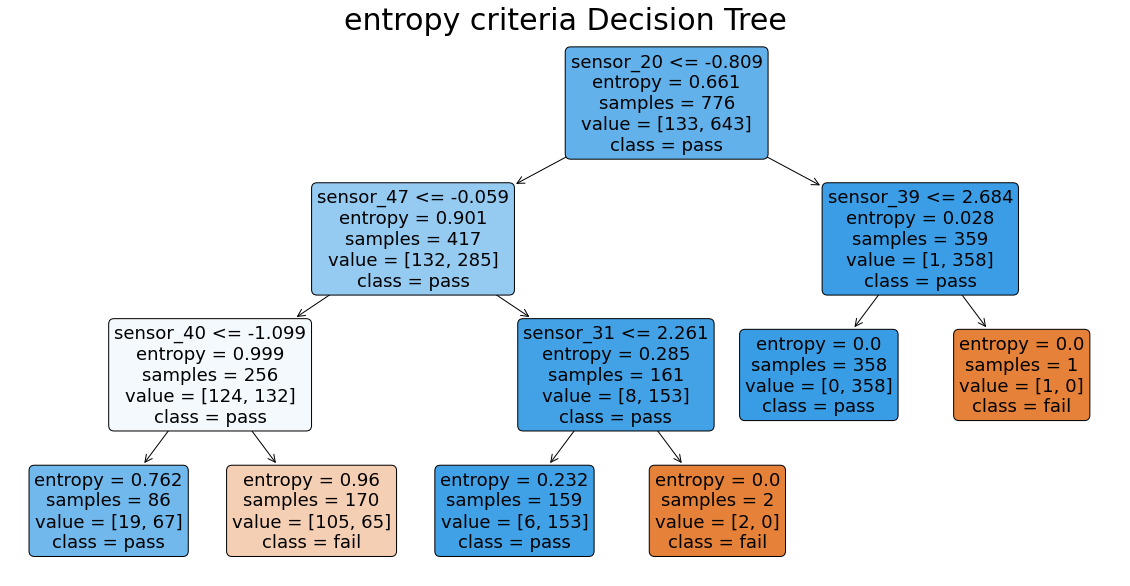

In [56]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
decision_tree.fit(X_train, y_train)

y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

y_test_pred_entropy = y_test_pred

print('Entropy, depth of 3, training f1_score:', f1_score(y_train, y_train_pred, pos_label=0))
print('Entropy, depth of 3, testing f1_score:', f1_score(y_test, y_test_pred, pos_label=0))

print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

plt.figure(figsize=(20,10))
decision_tree_plot = tree.plot_tree(decision_tree, filled=True, rounded=True, feature_names=X_train.columns, class_names=["fail", "pass"])
plt.title('entropy criteria Decision Tree', size=30)
plt.show()